In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import numpy as np
import astropy.units as u
import scipy.integrate as integrate
from scipy import interpolate
import make_image as mk
import importlib
importlib.reload(mk)


<module 'make_image' from '/home/aizwms/jasmine/jasmine_contami/make_image.py'>

In [3]:
df = mk.get_catalog_info("./ibnorth.csv")
mask_hwmag = df["hwmag"] < 14.5
hwmag_targets = df["hwmag"] 
c = SkyCoord(df["ra"].values, df["dec"].values, frame="icrs", unit="deg")
gal_l = c.galactic.l.deg
gal_b = c.galactic.b.deg

"""
c = SkyCoord(df["ra"].values, df["dec"].values, frame="icrs", unit="deg")
gal_l = c.galactic.l.deg
gal_b = c.galactic.b.deg
gal_l_b = np.array([gal_l , gal_b]).T
lmin = np.min(gal_l)
lmax = np.max(gal_l)
bmin = np.min(gal_b)
bmax = np.max(gal_b)
fig,ax = plt.subplots(figsize=(10,6), facecolor='w')
plt.scatter(gal_l, gal_b )
plt.xlabel("l", fontsize = 20)
plt.ylabel("b ", fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
"""

/home/aizwms/anaconda3/envs/hzlc_clone/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


'\nc = SkyCoord(df["ra"].values, df["dec"].values, frame="icrs", unit="deg")\ngal_l = c.galactic.l.deg\ngal_b = c.galactic.b.deg\ngal_l_b = np.array([gal_l , gal_b]).T\nlmin = np.min(gal_l)\nlmax = np.max(gal_l)\nbmin = np.min(gal_b)\nbmax = np.max(gal_b)\nfig,ax = plt.subplots(figsize=(10,6), facecolor=\'w\')\nplt.scatter(gal_l, gal_b )\nplt.xlabel("l", fontsize = 20)\nplt.ylabel("b ", fontsize = 20)\nplt.xticks(fontsize=18)\nplt.yticks(fontsize=18)\nplt.show()\n'

In [4]:
crpix = [0,0]
arcsec_deg =  0.00027777777777778 ##
sigma_x = .8 # pixel for gaussian
sigma_y = .8 # pixel for gaussian

## convolved gaussian 
x_cen_arr = np.linspace(-100, 100, 20000)
y_val_arr = []

for x_cen in x_cen_arr:
    val = mk.pixel_1d_gaussian(x_cen, .5, sigma_x)
    y_val_arr.append(val)
gauss_conv = mk.interpolate.interp1d(x_cen_arr,  y_val_arr)

## make WCS & pixel values for targets
cdelt =[0.4 * arcsec_deg , 0.4 * arcsec_deg]
skydir =  SkyCoord(359.85* u.deg , 0.54* u.deg, frame="galactic")#, l=0, b=0.5 * u.deg)
wcs = mk.create_wcs(skydir, "GAL", crpix = crpix, cdelt = cdelt)
pixel_targets = wcs.all_world2pix(gal_l, gal_b, 1)

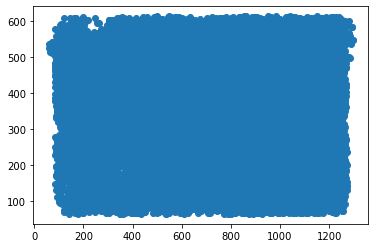

In [5]:
plt.scatter(pixel_targets[0], pixel_targets[1])

In [6]:

#plt.scatter(pixels [0], pixels [1], s =5)
#plt.scatter(pixels [0][mask_hwmag], pixels [1][mask_hwmag], s =5)

In [7]:
importlib.reload(mk)
image = mk.make_image(pixel_targets, hwmag_targets, gauss_conv)

In [8]:
import epsf_fit
importlib.reload( epsf_fit)
lim_vals = [0, 1400, -100, 700]

x_target = pixel_targets [0][mask_hwmag ]
y_target = pixel_targets [1][mask_hwmag ]
dx, dy  = epsf_fit.main(image, x_target, y_target, lim_vals )

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/aizwms/anaconda3/envs/hzlc_clone/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-79709b5df274>", line 7, in <module>
    dx, dy  = epsf_fit.main(image, x_target, y_target, lim_vals )
  File "/home/aizwms/jasmine/jasmine_contami/epsf_fit.py", line 49, in main
    epsf, fitted_stars = epsf_builder(stars)
  File "/home/aizwms/anaconda3/envs/hzlc_clone/lib/python3.8/site-packages/photutils/psf/epsf.py", line 371, in __call__
    return self.build_epsf(stars)
  File "/home/aizwms/anaconda3/envs/hzlc_clone/lib/python3.8/site-packages/photutils/psf/epsf.py", line 847, in build_epsf
    stars = self.fitter(epsf, stars)
  File "/home/aizwms/anaconda3/envs/hzlc_clone/lib/python3.8/site-packages/photutils/psf/epsf.py", line 120, in __call__
    fitted_star = self._fit_star(epsf, star, self.fitter,
  File "/home/aizwms/anaconda3/envs/

TypeError: object of type 'NoneType' has no len()

In [ ]:
"""""
lim_vals = [x_min, x_max, y_min, y_max]
plt.figure(figsize=(20,10))
plt.imshow(np.log10(image), vmin=0.2, extent=[x_min-0.5, x_max-0.5, y_max-0.5, y_min-0.5])
plt.colorbar()
#plt.ylim(y_min, y_max)
#plt.xlim(x_min, x_max)
plt.scatter( pixel_targets[0],  pixel_targets [1], s =5,color="r")
idx = 21
x_cen = pixel_targets[0][mask_hwmag][idx]
y_cen =  pixel_targets[1][mask_hwmag][idx]
wd = 30
plt.xlim(x_cen -wd, x_cen +wd)
plt.ylim(y_cen -wd, y_cen +wd)
""""

In [ ]:
pixel_targets[0] + np.random.rand(2)[0]

In [9]:
 %%time
importlib.reload( epsf_fit)
importlib.reload(mk)
displace_amp = 3
displace = 2 * displace_amp * np.random.rand(2) - displace_amp
pixel_targets_mov = np.array([pixel_targets[0] + displace [0], pixel_targets[1] + displace[1]])
image = mk.make_image(pixel_targets_mov, hwmag_targets, gauss_conv)


ERROR! Session/line number was not unique in database. History logging moved to new session 324
CPU times: user 2.37 s, sys: 4.54 ms, total: 2.38 s
Wall time: 2.38 s


In [10]:
%%time
x_target = pixel_targets_mov [0][mask_hwmag ]
y_target = pixel_targets_mov [1][mask_hwmag ]
dx, dy  = epsf_fit.main(image, x_target, y_target, lim_vals )

CPU times: user 18.3 s, sys: 36.1 ms, total: 18.4 s
Wall time: 18.3 s


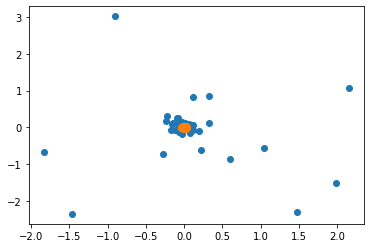

In [11]:
plt.scatter(dx, dy)
dr = (dx**2 + dy**2)**0.5
mask = dr < 0.05
plt.scatter(dx[mask], dy[mask])


In [12]:
1hr = 180 iters
24hr = 180 * 24

SyntaxError: invalid syntax (<ipython-input-12-34e4dfd953f9>, line 1)

In [102]:
180 * 24

4320

In [103]:
180 * 24 * 10

43200